<a href="https://colab.research.google.com/github/neto-riga/Metodos_Numericos/blob/main/Ejercicio_4_M%C3%A9todo_de_Newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Regresar al ínidce](https://github.com/neto-riga/Metodos_Numericos/blob/main/Portafolio.md#índice)

# Método de Newton
#### Martínez Venegas Raúl
#### Rivera Gálvez Ernesto
---

Una placa cuadrada con lados de longitud unitaria tiene su centro en el origen de un sistema de coordenadas cartesianas $(x,y)$.

Los lados son paralelos a cualesquiera de los ejes $x$ o $y$. En la placa se perfora un círculo de radio $r$. El centro del orificio está sobre el eje $x$ a una distancia $r$ del lado izquierdo de la placa. El centroide de la pieza restante tiene una abscisa igual a $c$, que está definida por:

$$ c= \pi r² \frac{0.5-r}{1- \pi r²}$$

El valor de $r$ que maximiza $c$ satisface la ecuación:

$$ \pi r² - 3r + 1 = 0 $$

- Mediante el método de Newton, determinar $r$ y por lo tanto $c$.
- Decide la tolerancia permitida.
- Explica la elección del valor inicial.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cmath
sns.set_theme()

Definimos nuestra ecuación y su derivada

In [ ]:
def f(x):
  return (np.pi*x**2)-(3*x)+1

In [ ]:
def d(x):
  return (2*np.pi*x)-3

Realizamos una gráfica para hacer un análisis sobre las posibles soluciones de nuestra ecuación.

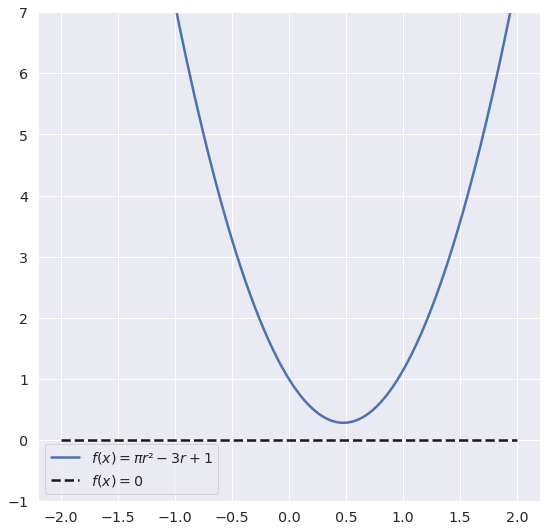

In [ ]:
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})

X = np.arange(-1, 2, 0.01)

fig = plt.figure(figsize=(9, 9))
plt.plot(X, [f(x) for x in X])
plt.hlines(y=0, xmin=-2, xmax=2, linestyles='--', color='k')
plt.legend([r'$f(x)= \pi r² - 3r + 1$', r'$f(x)=0$'])
plt.ylim(-1, 7);

Sabemos que nuestra ecuación tiene al menos dos raíces, pues es un polinomio de segundo grado; sin embargo, en el gráfico podemos observar que la función nunca cruza con el eje y, es decir, nuestra ecuación no tiene soluciones reales. Es por esto que le daremos un valor inicial complejo.

Primero encontraremos una solución a nuestra ecuación y después buscaremos el significado de nuestra solución con respecto al problema.  

Procedamos a hacer un análisis de la ecuación para proponer un valor inicial e iniciar el método de Newton.


Haremos uso de la fórmula general para encontrar el par de soluciones de nuestra ecuación de segundo grado. Sabemos que: 

$$x = \frac {-b \pm \sqrt {b^2 - 4ac}}{2a}$$

Así: 

$$r = \frac {-(-3) \pm \sqrt {(-3)^2 - 4(\pi)(1)}}{2(\pi)}$$

$$\\= \frac {3 \pm \sqrt {9 - 4\pi}}{2\pi}$$

$$\\= \frac {3 \pm \sqrt {-3.566370614}}{2\pi}$$

Como $-1=i^2$ entonces: 

$$\\= \frac {3 \pm \sqrt {3.566370614i^2}}{2\pi}$$

$$\\= \frac {3 \pm 1.888483681i}{2\pi}$$

$$\\= 0.477465 \pm 0.3005620i$$
Finalmente: 

$$r_{1}= 0.477465 + 0.3005620i$$

$$r_{2}= 0.477465 - 0.3005620i$$

Por lo tanto, implementamos el método de Newton con valor inicial $0.5 + 0.5i$ y una tolerancia del $5\mathrm{e}{-5}$ en el error relativo.

In [ ]:
xk = [complex(0.5, 0.5)]
yk = [f(xk[0])]
derivada=[d(xk[0])]
error_ab=[np.nan]
error_r=[1]
error_rp=[np.nan]
i=0

while error_r[i] > 0.00005:
  xk.append(xk[i]-(yk[i]/derivada[i]))
  i+=1
  yk.append(f(xk[i]))
  derivada.append(d(xk[i]))
  error_ab.append(abs(xk[i]-xk[i-1]))
  error_r.append(error_ab[i]/abs(xk[i]))
  error_rp.append(error_r[i]*100)

error_r[0] = np.nan

tabla = {'xk': xk,
         'f(xk)': yk,
         'f(xk)': derivada,
         'error absoluto': error_ab,
         'error relativo': error_r,
         'relativo porcentual': error_rp,}
Tabla = pd.DataFrame(tabla)
Tabla

,xk,f(xk),error absoluto,error relativo,relativo porcentual
0,0.500000+0.500000j,0.141593+3.141593j,NaN,NaN,NaN
1,0.484669+0.340154j,0.045266+2.137251j,0.160579,0.271193,27.119293
2,0.478256+0.302806j,0.004970+1.902587j,0.037895,0.066945,6.694478
3,0.477471+0.300569j,0.000037+1.888530j,0.002371,0.004203,0.420267
4,0.477465+0.300562j,0.000000+1.888484j,0.000009,0.000017,0.001658


En la tabla podemos observar que bastaron 4 iteraciones para obtener un error relativo de $1.7\mathrm{e}{-5}$, siendo el valor aproximado a nuestra raíz $0.47746 + 0.30056i$. Así, podemos calcular $c$:

In [ ]:
c= np.pi*(xk[-1]**2)*((0.5-xk[-1])/(1-np.pi*(xk[-1])))
print('El valor de c es:', c)

El valor de c es: (-0.03227925424562379+0.2802418978946021j)


Con $c=-0.03227+0.28024i$, podemos observar que si $r$ es imaginacio $c$ también lo será. En el siguiente par de gráficas es posbile obervar como los errores tienden a cero según realizamos más iteraciones. 

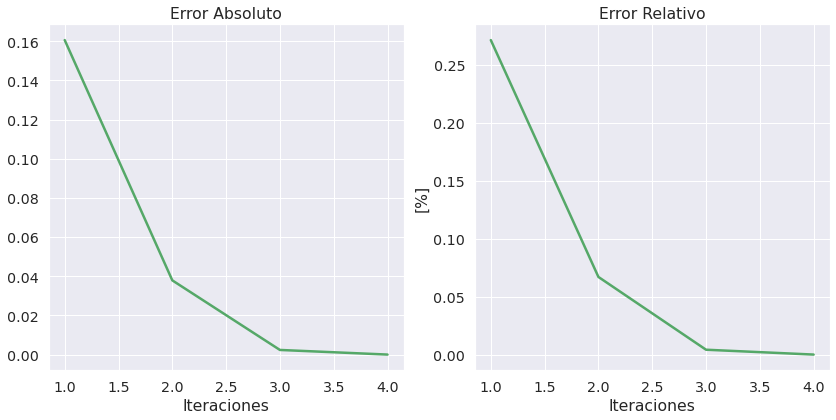

In [ ]:
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})

lim_inf = 0.68
lim_sup = 0.85
X = np.arange(lim_inf, lim_sup, 0.05)
fig = plt.figure(figsize=(14,14))
eje1=plt.subplot(223)
eje2=plt.subplot(224)

eje1.plot(np.arange(1, len(error_ab)), error_ab[1:], c='g')
eje1.set_title('Error Absoluto')
eje1.set_xlabel('Iteraciones')

eje2.plot(np.arange(1, len(error_ab)), error_r[1:], c='g')
eje2.set_title('Error Relativo')
eje2.set_xlabel('Iteraciones')
eje2.set_ylabel('[%]');

### Análisis y conclusiones

Debemos de tener presente que el problema trata de una placa y la solución debe tener significado físico. El radio $r$ que cumple con la ecuación que maximiza a $c$ es un valor imaginario, pero ¿tiene sentido hablar de un radio imaginario sobre una placa real?

Aquí es cuando el significado físico importa, en otras palabras, no existe un radio real, lo que quiere decir que no se puede maximizar la función en los reales. Veamos qué pasa con la función c y analicemos


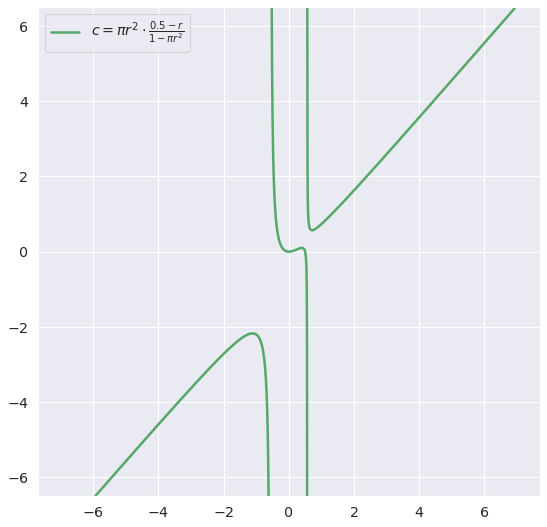

In [ ]:
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})

def c(r): return np.pi*np.power(r,2) * (0.5 - r) / (1 - np.pi*np.power(r,2))
X1 = np.arange(-7, -0.57, 0.001)
X2 = np.arange(-0.56, 0.563, 0.001)
X3 = np.arange(0.567, 7, 0.001)

fig = plt.figure(figsize=(9, 9))
plt.plot(X1, [c(x) for x in X1], 'g', X2, [c(x) for x in X2], 'g', X3, [c(x) for x in X3], 'g')
plt.legend([r'$c = \pi r^2 \cdot \frac{0.5 - r}{1 - \pi r^2}$'])
plt.ylim(-6.5, 6.5);

Como podemos ver, $c$ no tiene un máximo global, por lo que encontrar una $r$ que sea el máximo resulta en un valor imaginario, pues en los reales no tiene sentido.

Como conlusión, podemos decir que la abscisa del centroide no tiene máximo real, por lo que nuestra solución es puramente matemática y no tiene significado físico.

## [Regresar al ínidce](https://github.com/neto-riga/Metodos_Numericos/blob/main/Portafolio.md#índice)